# Fake News Detection

- Mabahes Vijeh, Tohid Eghdami
- 26 Dec 2024

# 1: Download Dataset

Go to [FakeNews-DataSet-Website-kaggle](https://www.kaggle.com/datasets/subho117/fake-news-detection-using-machine-learning) address and download `archive.zip`(41MB) and extract `News.csv`(111MB) in `fake-news-detection` folder.

# 2: Install Dependencies

Run a terminal and install these packages by `pip` like this:
If u got error in arch base systems you can add `--break-system-packages` at the end of every `pip` command. or use `yay -S python-(package name)` to install them.

```bash
pip install scikit-learn
pip install wordcloud
pip install nltk
pip install tqdm
pip install pandas
pip install seaborn
pip install matplotlib
pip install xgboost
```

## Compelete `NLTK` Installition

In your terminal open a python session by entring `python` command and run these commands to download some modules:

```python
import nltk

nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
```
You need to run this command once and then you can use nltk without errors in your python apps.


# 3: Importing Libraries and Datasets

The libraries used are : 

- Pandas: For importing the dataset.
- Seaborn/Matplotlib: For data visualization.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Let’s import the downloaded dataset. 

In [2]:
data = pd.read_csv('News.csv',index_col=0)
data.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0



- We can see shape of our dataset that means we have `44919` records that each record(or row) has `5` fields(or columns :`title`	`text`	`subject`	`date`	`class`})


In [3]:
data.shape

(44919, 5)


## Remove Unusable Fields in Dataset 
There is no need to `title`, `subject` and `date` columns, so we can drop them:


In [4]:
data = data.drop(["title", "subject","date"], axis = 1)

Check if there is any null value to drop them:

In [5]:
data.isnull().sum()

text     0
class    0
dtype: int64


- OK, no null values. 

Now we have to shuffle the dataset to prevent the model to get bias. After that we will reset the index and then drop it. Because index column is not useful to us.


In [6]:
# Shuffling
data = data.sample(frac=1)
data.reset_index(inplace=True)
# drop index column
data.drop(["index"], axis=1, inplace=True)


Now Let’s explore the unique values in the each category using below code.


<Axes: xlabel='class', ylabel='count'>

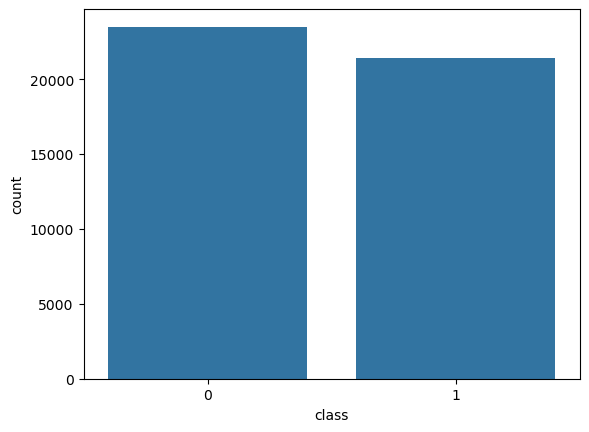

In [7]:
sns.countplot(data=data,
			x='class',
			order=data['class'].value_counts().index)


# 4: Preprocessing and analysis of News column

Firstly we will remove all the stopwords, punctuations and any irrelevant spaces from the text. For that `NLTK` Library is required and some of it’s module need to be downloaded. So, for that run the below code.

- I commented `nltk.download()` lines because i have downloaded them in `# 1: Download Dataset` section, if you skipped that section you can uncomment these lines to download modules


In [8]:
from tqdm import tqdm
import re
import nltk
#nltk.download('wordnet')
#nltk.download('punkt')
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud


Once we have all the required modules, we can create a function name preprocess text. This function will preprocess all the data given as input.


In [9]:
def preprocess_text(text_data):
	preprocessed_text = []

	for sentence in tqdm(text_data):
		sentence = re.sub(r'[^\w\s]', '', sentence)
		preprocessed_text.append(' '.join(token.lower()
								for token in str(sentence).split()
								if token not in stopwords.words('english')))

	return preprocessed_text


To implement the function in all the news in the text column, run the below command.
It will takes a few minutes. (18:21 for me)

- I runned this before and saved in a `data.pkl` file. So no need to run in again and we can easily Load `data.pkl`


In [10]:
#preprocessed_review = preprocess_text(data['text'].values)

#data['text'] = preprocessed_review


### Save `data`

Saving time by saving `data` by using `joblib`:

- I already saved data and noo need to run this code again, so i commented it


In [11]:
import joblib

file_name = "data.pkl"
#joblib.dump(data,file_name)
#print(f"Data saved as {file_name}")



### Load `data`

Saving time by Loading `data` that we saved in the past by using `joblib`:


In [12]:

# Easily we can run this code and load our ~18 minutes time
data = joblib.load(file_name)
print(f"Data loaded from {file_name}")


Data loaded from data.pkl



Let’s visualize the WordCloud for fake and real news separately.

## Real News:


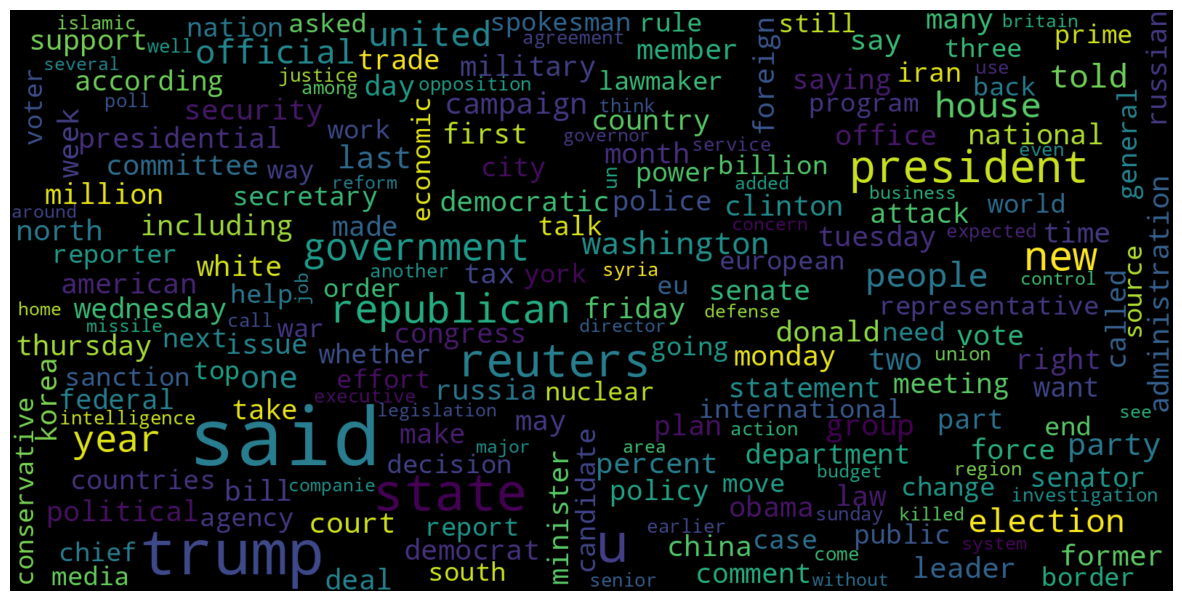

In [13]:
# Real
consolidated = ' '.join(
	word for word in data['text'][data['class'] == 1].astype(str))

wordCloud = WordCloud(width=1600,
					height=800,
					random_state=21,
					max_font_size=110,
					collocations=False)

plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()


## Fake News:


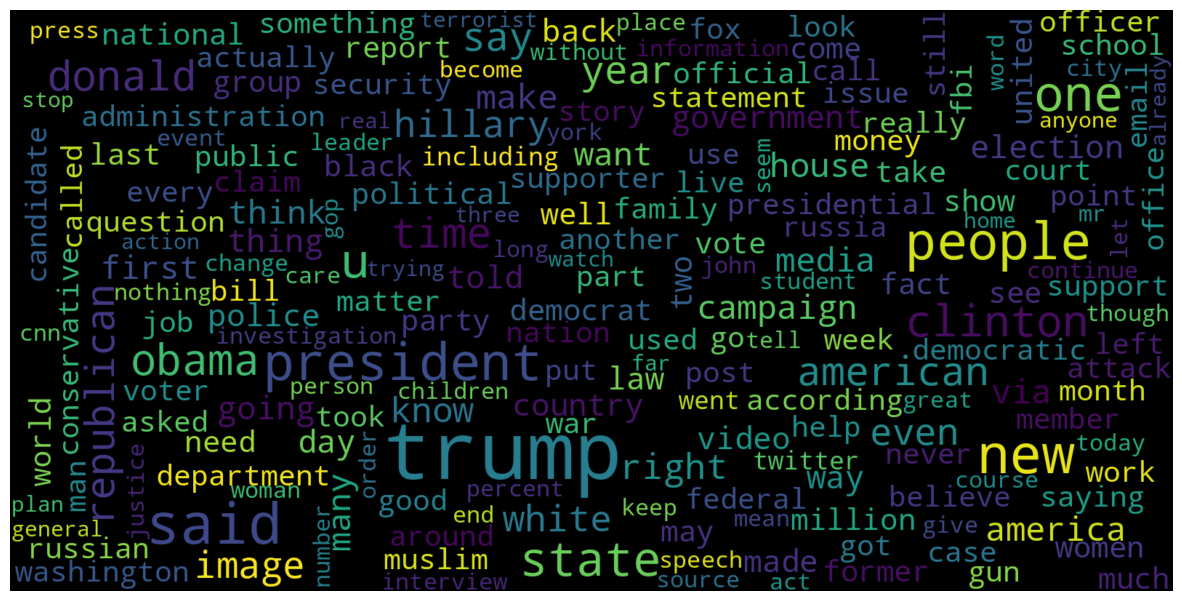

In [14]:
# Fake
consolidated = ' '.join(
	word for word in data['text'][data['class'] == 0].astype(str))

wordCloud = WordCloud(width=1600,
					height=800,
					random_state=21,
					max_font_size=110,
					collocations=False)

plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

Now, Let’s plot the bargraph of the top 20 most frequent words.

<Axes: title={'center': 'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

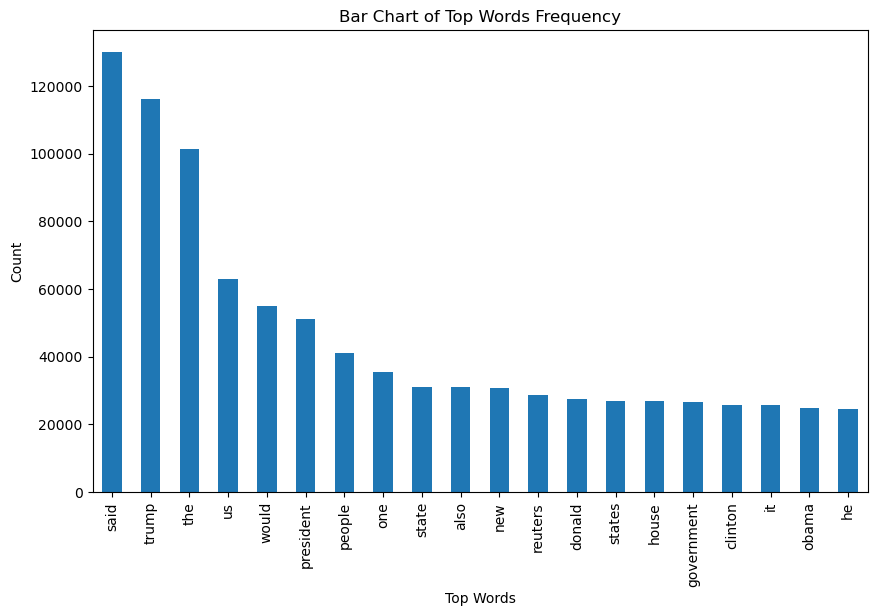

In [15]:
from sklearn.feature_extraction.text import CountVectorizer


def get_top_n_words(corpus, n=None):
	vec = CountVectorizer().fit(corpus)
	bag_of_words = vec.transform(corpus)
	sum_words = bag_of_words.sum(axis=0)
	words_freq = [(word, sum_words[0, idx])
				for word, idx in vec.vocabulary_.items()]
	words_freq = sorted(words_freq, key=lambda x: x[1],
						reverse=True)
	return words_freq[:n]


common_words = get_top_n_words(data['text'], 20)
df1 = pd.DataFrame(common_words, columns=['Review', 'count'])

df1.groupby('Review').sum()['count'].sort_values(ascending=False).plot(
	kind='bar',
	figsize=(10, 6),
	xlabel="Top Words",
	ylabel="Count",
	title="Bar Chart of Top Words Frequency"
)


# 5: Converting text into Vectors

Before converting the data into vectors, split it into train and test.


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(data['text'],
													data['class'],
													test_size=0.25)


Now we can convert the training data into vectors using TfidfVectorizer.


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
x_train = vectorization.fit_transform(x_train)
x_test = vectorization.transform(x_test)


# 6: Modet Training, Evaluation, and Prediction

Now, the dataset is ready to train the model

For training we will use models below and evaluate the prediction accuracy using `accuracy_score`:

- Logistic Regression
- ~Support Vector Machine (SVM)~ (This one takes too much time)
- Decision Tree
- XGBoost
- ~Multi-Layer Perceptron (MLP)~ (This one takes too much time)

## Preparing Models:


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

# Initialize the models

models = {    
    "LogisticRegression": LogisticRegression(max_iter=500,
                                             C=0.5),
    
    #"SVM": SVC(C=1.5,
    #          kernel='rbf'),
    
    "Decision Tree": DecisionTreeClassifier(max_depth=10,
                                            min_samples_split=5),
    
    "XGBoost": XGBClassifier(eval_metric='mlogloss',
                             n_estimators=100,
                             learning_rate=0.1),
    
    #"MLP": MLPClassifier(hidden_layer_sizes=(512, 128))
    }



## Run Models and Show Results:

We used `time` to calculate how much take to train and test each model and at the end of every step we will visualize result by using `confusion matrix`:


Model: LogisticRegression
--------------------
	Accuracy Train: 0.989670
	Accuracy Test: 0.986198

Training & Test Time: 0.490303 seconds
--------------------



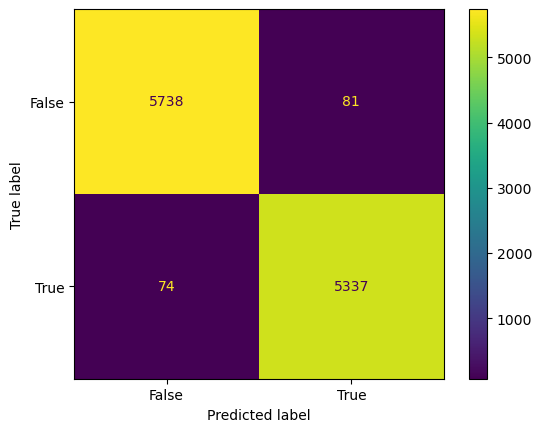

--------------------

Model: Decision Tree
--------------------
	Accuracy Train: 0.997536
	Accuracy Test: 0.995280

Training & Test Time: 7.611851 seconds
--------------------



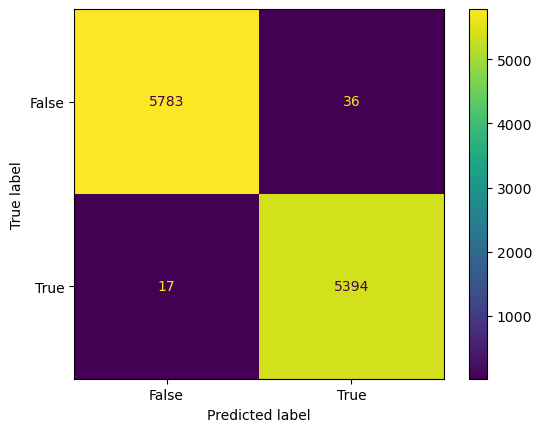

--------------------

Model: XGBoost
--------------------
	Accuracy Train: 0.999852
	Accuracy Test: 0.996171

Training & Test Time: 94.419317 seconds
--------------------



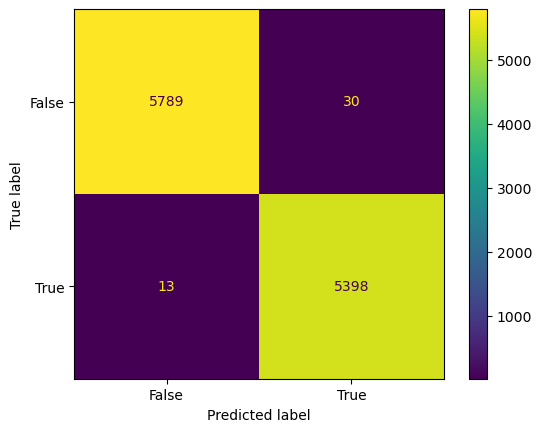

--------------------



In [19]:
from sklearn import metrics
import time
from sklearn.metrics import accuracy_score


# Train the models and calculate metrics
for name, model in models.items():
    print("="*50)
    print(f"Model: {name}")
    print("-"*20)

     
    start_time = time.time()
    
    model.fit(x_train, y_train)
    
    y_pred_train = model.predict(x_train)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    
    y_pred_test = model.predict(x_test)
    accuracy_test = accuracy_score(y_test, y_pred_test)

    
    training_test_time = time.time() - start_time

    print(f"\tAccuracy Train: {accuracy_train:.6f}")
    print(f"\tAccuracy Test: {accuracy_test:.6f}")
    
    print()
    
    print(f"Training & Test Time: {training_test_time:.6f} seconds")
    
    print("-"*20)
    print()
    
    # Confusion matrix of Results 
    
    cm = metrics.confusion_matrix(y_test, y_pred_test)
    
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
    											display_labels=[False, True])
    
    cm_display.plot()
    plt.show()
    print("-"*20)
    print()